# Biodiversity - Porfolio project #

This project goal is to analyse the National Parks data surrounded by endangered species in different park. The project will be proceeded through those below steps:
    
- Scope the analysis 
- Prepare data
- Plot & Analyse data
- Evaluation

The questions to address around the project would be:
- What is the distribution of species by conservation status?
- What is the distribution of species among parks?
- Are certain types of species are more likely to be endangered?

**Data source**

The data includes `observations.csv` and `species_infor.csv`, both are collected from https://www.codecademy.com/
The data is inspired by rsal data, but it is a fictional data for learning purpose.

Note: Assumption statements could be made along the project to inform reasonable flow.
 


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Read the csv files
path1 = '/Users/ducanhtran/biodiversity/species_info.csv'
species = pd.read_csv(path1)
species.head()


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


## Scope the analysis & Goal setting

The analysis capability of this project focus on descriptive analysis to understand the conservation status among species in National Park data. By doing so, it helps to reinforce the understanding of:

- What is the distribution of species by conservation status?
- What is the distribution of species among parks?
- Are certain types of species are more likely to be endangered?
- Which animal is the most prevalent and what is their distribtuion among parks?

To conduct the project, the following scopes would be included and elaborated in the next sections: Prepare data, Plot chart, Analyse, Evaluation & conclusion.


### Prepare data
#### Load the data

There are two files to be loaded: (1)`observations.csv` and (2)`species_infor.csv`
- The (1) table - Species table, is a directory for specific animal information, includes 4 columns:
    + Category: the type of species such as mammal, plant, fish etc.
    + Scientific name is the identitying term used in science
    + Common name is the universal term used
    + Conservation status include 5 levels: Not at risk, Species of concern, Endangered, In recovery, Threatened
- The (2) table - Observations table is the observed number of specific animals on the parks, includes 3 columns:
    + Scientific_name is the identitying term used in science
    + Park_name is the National park name, which includes 4 parks
    + Observations is the observed number of specific animals
 
Both data share the same variable named `Scientific_name`, which could be used to combine the two tables.



In [26]:
#Check the data in (1) in terms of data types and data size
print(species.dtypes)
species.shape

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


(5824, 4)

In [27]:
path2 = '/Users/ducanhtran/biodiversity/observations.csv'
obsev = pd.read_csv(path2)
obsev.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [28]:
#Check the data in (1) in terms of data types and data size
print(obsev.dtypes)
obsev.shape

scientific_name    object
park_name          object
observations        int64
dtype: object


(23296, 3)

#### Clean the data
##### Check NaN value

In [8]:
print(species.isna().sum())
print(obsev.isna().sum())

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64
scientific_name    0
park_name          0
observations       0
dtype: int64


The species table: 96.7% of the conservation_status is NaN. 
- My assumption is that it might mean that these species are not considered to be at risk (i.e., not 'Species of Concern', 'Endangered', 'Threatened', or 'In Recovery'). Hence, replacing those datas with 'Not at risk' value and continue the analysis

The observation table is eligigle for further analysis.

##### Replace Nan value in species table

In [17]:
species['conservation_status'] = species['conservation_status'].fillna('Not at Risk')
print(species.isna().sum())
species.head()

category               0
scientific_name        0
common_names           0
conservation_status    0
dtype: int64


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not at Risk
1,Mammal,Bos bison,"American Bison, Bison",Not at Risk
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not at Risk
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not at Risk
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not at Risk


#### Combine tables

In [18]:
#Combine the two data table via the joint variable scientific_name  

combine = pd.merge(species, obsev,how='left', on='scientific_name')
combine.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not at Risk,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not at Risk,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not at Risk,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not at Risk,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",Not at Risk,Yosemite National Park,128


### Plot & analyze data

In [34]:
total_observations = total_species['observations'].sum()
print(f'The total of observed species in 4 parks is {total_observations}')

The total of observed species in 4 parks is 3645247


In [98]:
total_species = combine.groupby(combine.category)['observations'].sum().reset_index()
total_species['percentage in total'] = ((total_species['observations'] / total_observations) * 100).round()
total_species.head(10)

,category,observations,percentage in total
0,Amphibian,45068,1.0
1,Bird,332371,9.0
2,Fish,72901,2.0
3,Mammal,163120,4.0
4,Nonvascular Plant,190653,5.0
5,Reptile,45822,1.0
6,Vascular Plant,2795312,77.0


Key highlight:
- 77% are vascular plants, followed by birds.
- Fish is the species with the least population in the mentioned parks.

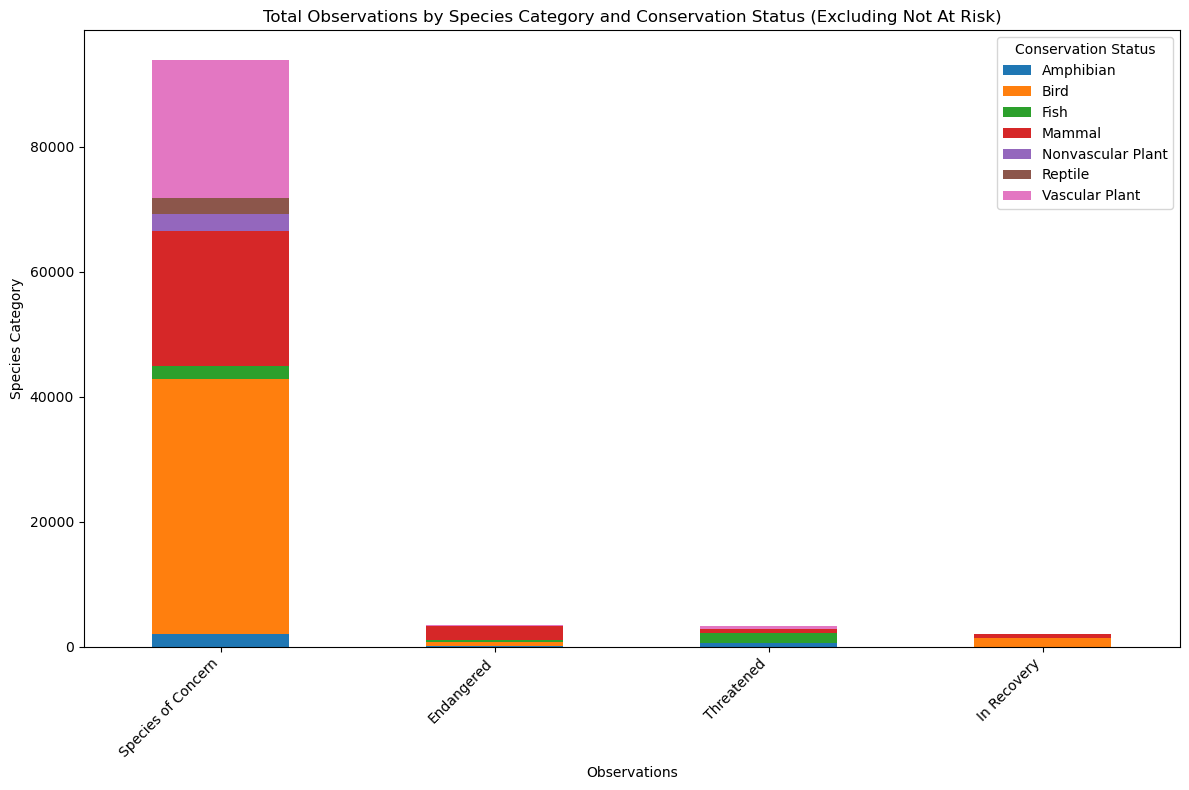

In [40]:
# Filter out 'Not At Risk' in conservation status
combine['conservation_status'] = combine['conservation_status'].astype(str)
combine_filtered = combine[combine['conservation_status'] != 'Not at Risk']

# Aggregate observations by species category and conservation status
byspecies = combine_filtered.groupby(['conservation_status', 'category'])['observations'].sum().unstack(fill_value=0)

# Sort by the total observations across all conservation statuses
byspecies['Total'] = byspecies.sum(axis=1)
byspecies = byspecies.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plotting
byspecies.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add title and labels
plt.title('Total Observations by Species Category and Conservation Status (Excluding Not At Risk)')
plt.xlabel('Observations')
plt.ylabel('Species Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Conservation Status')
plt.tight_layout()
plt.show()

- All of the species are of concern due to the likelihood of extinction, with birds, mammals, and vascular plants being the top three groups with the highest proportions.


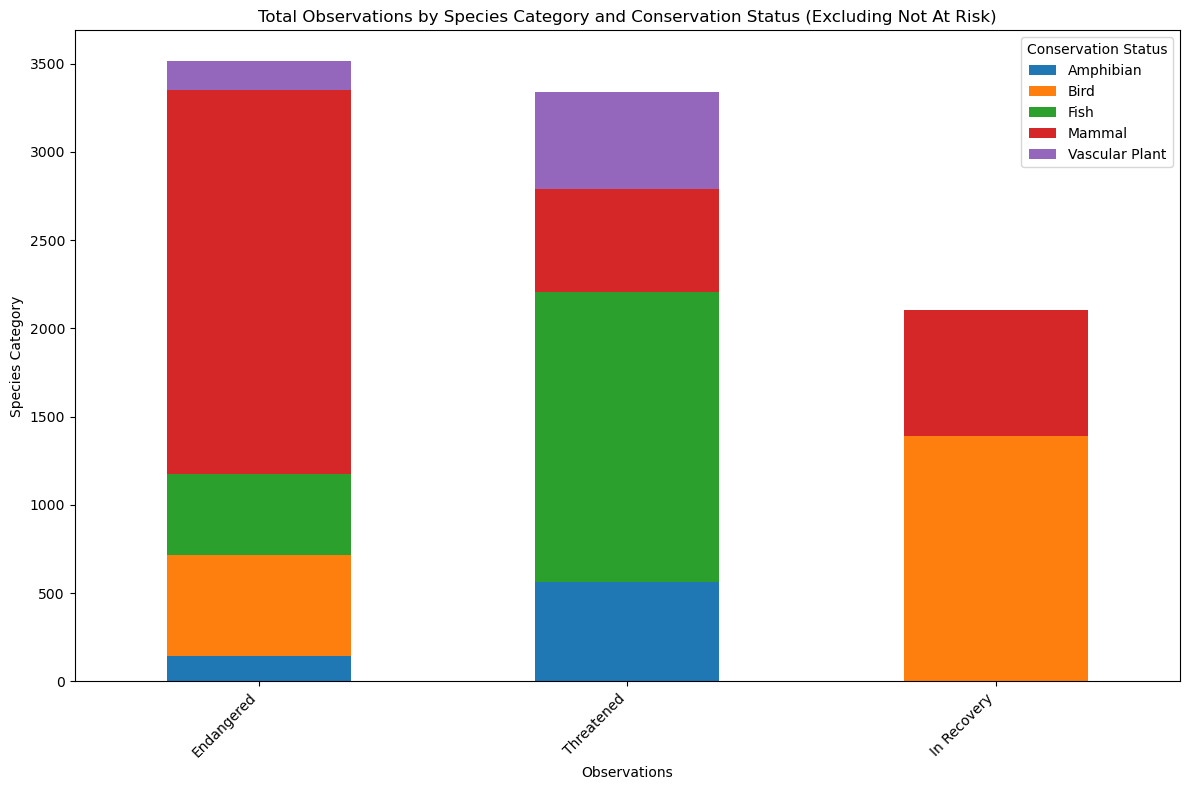

In [42]:
# Filter out 'Not At Risk' & 'Species of concerns' in conservation status
combine['conservation_status'] = combine['conservation_status'].astype(str)
combine_filtered = combine[(combine['conservation_status'] != 'Not at Risk') & (combine['conservation_status'] != 'Species of Concern')]

# Aggregate observations by species category and conservation status
byspecies = combine_filtered.groupby(['conservation_status', 'category'])['observations'].sum().unstack(fill_value=0)

# Sort by the total observations across all conservation statuses
byspecies['Total'] = byspecies.sum(axis=1)
byspecies = byspecies.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plotting
byspecies.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add title and labels
plt.title('Total Observations by Species Category and Conservation Status (Excluding Not At Risk)')
plt.xlabel('Observations')
plt.ylabel('Species Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Conservation Status')
plt.tight_layout()
plt.show()

Identify the definition of each level help us to better understand the data:
+ Endangered: Species at `serious risk of extinction` throughout all or a significant portion of their range.
+ Threatened: Species `likely to become endangered in the near future` if protective measures are not taken.
+ Species of concern: `may be at risk` but do not currently meet the criteria for being classified as endangered or threatened. They require monitoring and potential conservation efforts.
+ In recovery: Species that were previously endangered or threatened but are `now increasing in population` and moving towards a more stable and sustainable status due to conservation efforts.

Source: IUCN Red List

Highlight:
- Mammals and birds are among the most endangered species due to their high proportions. This situation is exacerbated by the fact that both groups also have a significantly higher proportion of species of concern, with rates double and triple those of other species.

`Percentage of species per each status of conservation`

In [97]:
status_pct = combine_filtered.groupby(combine_filtered.conservation_status)['observations'].sum().reset_index()
status_pct.head()

status_pct2 = combine.groupby(['conservation_status', 'category'])['observations'].sum().round(0).reset_index()
status_pct2.head()
status_pct2 = status_pct2.pivot(index='conservation_status', columns='category', values='observations')
status_pct2.head()


status_pct3 = status_pct2.sum(axis=1)
status_pct3 = (status_pct2.div(status_pct3,axis=0)*100).round()

status_pct3.head(10)


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,4.0,16.0,13.0,62.0,NaN,NaN,5.0
In Recovery,NaN,66.0,NaN,34.0,NaN,NaN,NaN
Not at Risk,1.0,8.0,2.0,4.0,5.0,1.0,78.0
Species of Concern,2.0,43.0,2.0,23.0,3.0,3.0,24.0
Threatened,17.0,NaN,49.0,17.0,NaN,NaN,17.0


In [96]:

status_pct2 = combine.groupby(['conservation_status', 'category'])['observations'].sum().round(2).reset_index()
status_pct2 = status_pct2.pivot(index='category', columns='conservation_status', values='observations')
status_pct2.head()


status_pct3 = status_pct2.sum(axis=1)
status_pct3 = (status_pct2.div(status_pct3,axis=0)*100).round()

status_pct3.head(10)

conservation_status,Endangered,In Recovery,Not at Risk,Species of Concern,Threatened
category,,,,,
Amphibian,0.0,NaN,94.0,5.0,1.0
Bird,0.0,0.0,87.0,12.0,NaN
Fish,1.0,NaN,94.0,3.0,2.0
Mammal,1.0,0.0,85.0,13.0,0.0
Nonvascular Plant,NaN,NaN,99.0,1.0,NaN
Reptile,NaN,NaN,94.0,6.0,NaN
Vascular Plant,0.0,NaN,99.0,1.0,0.0


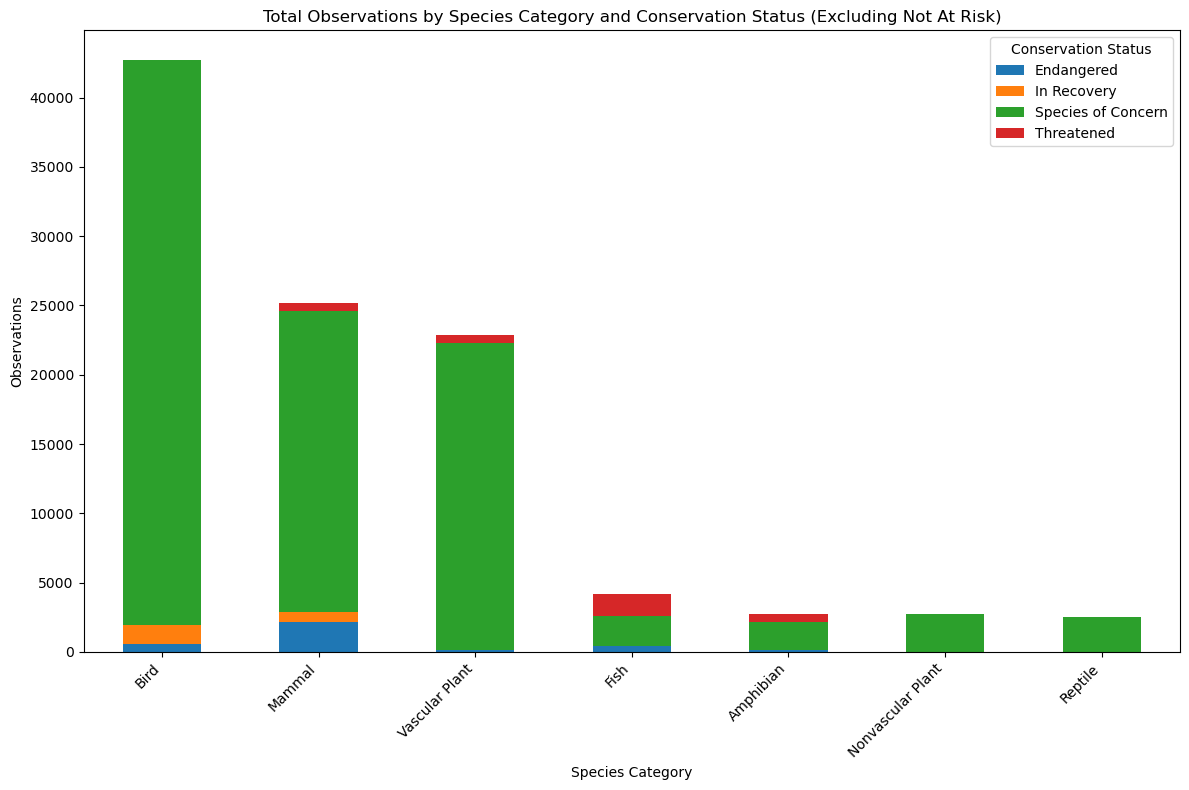

In [71]:
# Filter out 'Not At Risk' in conservation status
combine['conservation_status'] = combine['conservation_status'].astype(str)
combine_filtered = combine[combine['conservation_status'] != 'Not at Risk']

# Aggregate observations by species category and conservation status
byspecies = combine_filtered.groupby(['category', 'conservation_status'])['observations'].sum().unstack(fill_value=0)

# Sort by the total observations across all conservation statuses
byspecies['Total'] = byspecies.sum(axis=1)
byspecies = byspecies.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plotting
byspecies.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add title and labels
plt.title('Total Observations by Species Category and Conservation Status (Excluding Not At Risk)')
plt.xlabel('Species Category')
plt.ylabel('Observations')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Conservation Status')
plt.tight_layout()
plt.show()

#### Checking the `at_risk` and `not_at_risk` rate among species

In [79]:
total_species.head()

,category,observations,percentage in total
0,Amphibian,45068,1.0
1,Bird,332371,9.0
2,Fish,72901,2.0
3,Mammal,163120,4.0
4,Nonvascular Plant,190653,5.0


In [124]:
count_species = combine.groupby(['conservation_status', 'category'])['scientific_name'].nunique().round(2).reset_index()
count_species = count_species.pivot(index='category', columns='conservation_status', values='scientific_name')
count_species.head(10)

conservation_status,Endangered,In Recovery,Not at Risk,Species of Concern,Threatened
category,,,,,
Amphibian,1.0,NaN,72.0,4.0,2.0
Bird,4.0,3.0,413.0,68.0,NaN
Fish,3.0,NaN,115.0,4.0,4.0
Mammal,6.0,1.0,146.0,22.0,2.0
Nonvascular Plant,NaN,NaN,328.0,5.0,NaN
Reptile,NaN,NaN,73.0,5.0,NaN
Vascular Plant,1.0,NaN,4216.0,43.0,2.0


In [95]:
total_unique = combine['scientific_name'].nunique()

count_species = combine.groupby(['category'])['scientific_name'].nunique().round(2).reset_index()
count_species['percentage in total'] = (((count_species['scientific_name'])/total_unique)*100).round()
count_species.head(10)


,category,scientific_name,percentage in total
0,Amphibian,79,1.0
1,Bird,488,9.0
2,Fish,125,2.0
3,Mammal,176,3.0
4,Nonvascular Plant,333,6.0
5,Reptile,78,1.0
6,Vascular Plant,4262,77.0


In [113]:
notatrisk = combine[combine['conservation_status'] == 'Not at Risk']
notatrisk = notatrisk.groupby(['category'])['scientific_name'].nunique()
notatrisk.head(10)

category
Amphibian              72
Bird                  413
Fish                  115
Mammal                146
Nonvascular Plant     328
Reptile                73
Vascular Plant       4216
Name: scientific_name, dtype: int64

In [114]:
atrisk = combine[combine['conservation_status'] != 'Not at Risk']
atrisk = atrisk.groupby(['category'])['scientific_name'].nunique()
atrisk.head()

category
Amphibian             7
Bird                 75
Fish                 11
Mammal               30
Nonvascular Plant     5
Name: scientific_name, dtype: int64

In [123]:
combine2 = pd.merge(notatrisk,atrisk, on='category')

combine2.columns = ['not_at_risk','at_risk']
combine2['percent_at_risk'] =  ((combine2['at_risk']/(combine2['not_at_risk']+combine2['at_risk']))*100).round()
combine2.head(10)

,not_at_risk,at_risk,percent_at_risk
category,,,
Amphibian,72,7,9.0
Bird,413,75,15.0
Fish,115,11,9.0
Mammal,146,30,17.0
Nonvascular Plant,328,5,2.0
Reptile,73,5,6.0
Vascular Plant,4216,46,1.0


- Birth and mammal have the most percentage of at risk status

In [137]:
print(combine2.not_at_risk.sum())
print(combine2.at_risk.sum())

5363
179


#### Statistical significance

The Chi-Square test is a statistical test used to determine if there is a significant association between categorical variables. It is often used in hypothesis testing and helps to understand if the observed frequency distribution of categorical data differs from the expected frequency distribution.

The next excercise to to examinate the association between the risk status and the different species. Since both Bird and Mammal have the greatest risk percentage in their population. The chi square test would focus on the abovementioned species for further clarification.

There are 2 hypothesises:
+ H0: There is no association between risk status and the species, also understand that the distribution of the risk status by species happen by chance.
+ H1: There is associated relationship between the risk status and the species, indicating the underlying relationship between the 2 variables.


##### Observed contigency - Bird & Mammal

In [130]:
from scipy.stats import chi2_contingency

contingency1 = [[413, 75],
              [146, 30]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.16170148316545574, pvalue=0.6875948096661336, dof=1, expected_freq=array([[410.8313253,  77.1686747],
       [148.1686747,  27.8313253]]))

##### Observed contigency - Mammal & Reptile

In [134]:
from scipy.stats import chi2_contingency

contingency1 = [[146, 30],
              [73, 5]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[151.7480315,  24.2519685],
       [ 67.2519685,  10.7480315]]))

Since the p-value (0.0384) is less than the significance level (0.05), we reject the null hypothesis. T

> This means that there is a significant association between being a mammal or a reptile and their risk status (at risk or not at risk).

##### Observed contigency - Bird & Reptile

In [133]:
from scipy.stats import chi2_contingency

contingency1 = [[413, 75],
              [73, 5]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=3.739654778685496, pvalue=0.053135422321542065, dof=1, expected_freq=array([[419.02473498,  68.97526502],
       [ 66.97526502,  11.02473498]]))

##### Observed contigency - Bird & Amphibian

In [132]:
from scipy.stats import chi2_contingency

contingency1 = [[72, 7],
              [413, 75]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=1.831621580618698, pvalue=0.17593613249594683, dof=1, expected_freq=array([[ 67.57495591,  11.42504409],
       [417.42504409,  70.57495591]]))

##### Observed contigency - Nonvascular plant & Vascular plant

In [131]:
from scipy.stats import chi2_contingency

contingency1 = [[328, 5],
              [4216, 46]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.19069121233812064, pvalue=0.6623419491381985, dof=1, expected_freq=array([[3.29304026e+02, 3.69597388e+00],
       [4.21469597e+03, 4.73040261e+01]]))

#### Park 

In [75]:
print(combine.park_name.unique())

['Bryce National Park' 'Yellowstone National Park'
 'Great Smoky Mountains National Park' 'Yosemite National Park']


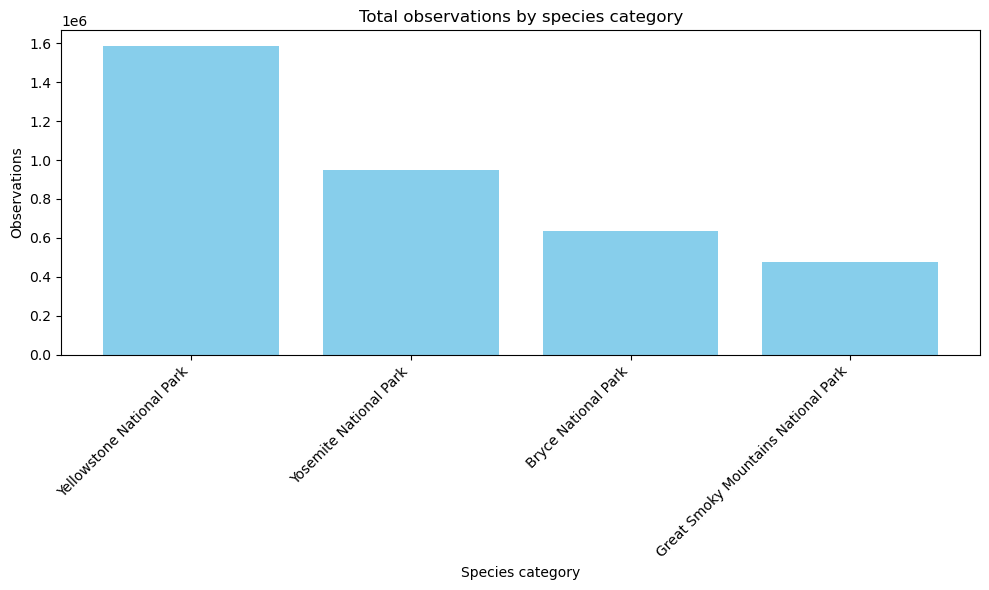

In [81]:
# Total observations by species category - Bar chart

total_species = combine.groupby(combine.park_name)['observations'].sum().reset_index()
total_species = total_species.sort_values(by='observations', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(total_species.park_name, total_species['observations'], color='skyblue')
plt.title('Total observations by species category')
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Species category')
plt.ylabel('Observations')

plt.tight_layout() 
plt.show()

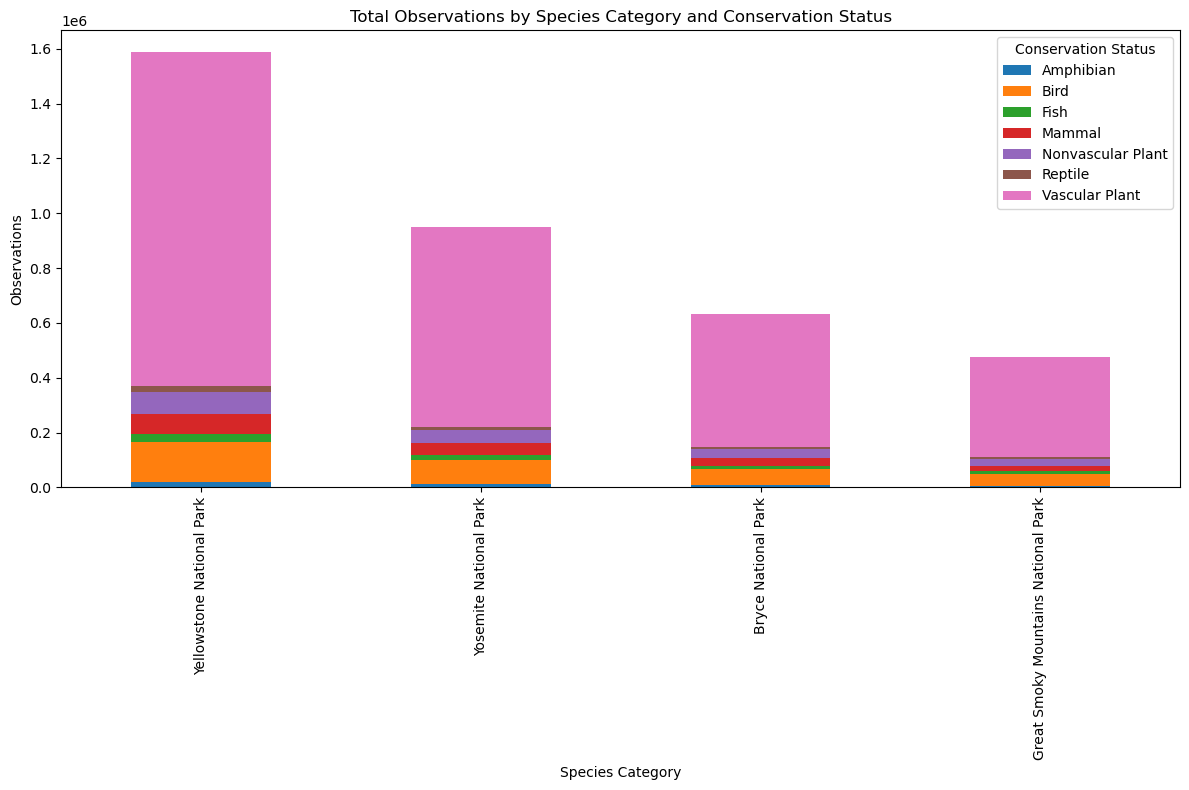

In [82]:
#Top ranking endangered species
byspecies = combine.groupby(['park_name', 'category'])['observations'].sum().unstack(fill_value=0)

# Plotting
byspecies['Total'] = byspecies.sum(axis=1)
byspecies = byspecies.sort_values(by='Total', ascending=False).drop(columns='Total')
byspecies.plot(kind='bar', stacked=True, figsize=(12, 8))


# Add title and labels
plt.title('Total Observations by Species Category and Conservation Status')
plt.xlabel('Species Category')
plt.ylabel('Observations')
plt.legend(title='Conservation Status')
plt.tight_layout()
plt.show()

- Yellowstone National Park has the greatest diversity of species across all species categories and conservation status.


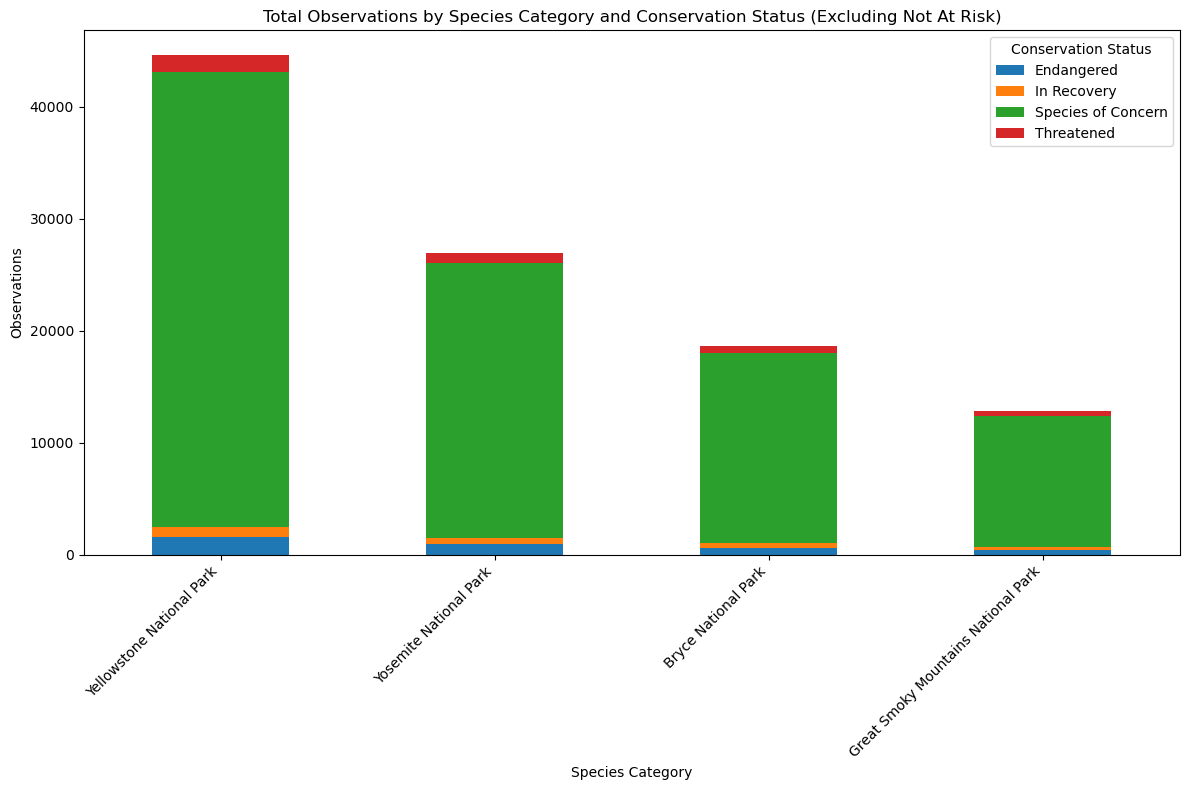

In [83]:

# Filter out 'Not At Risk' in conservation status
combine['conservation_status'] = combine['conservation_status'].astype(str)
combine_filtered = combine[combine['conservation_status'] != 'Not at Risk']

# Aggregate observations by species category and conservation status
byspecies = combine_filtered.groupby(['park_name', 'conservation_status'])['observations'].sum().unstack(fill_value=0)

# Sort by the total observations across all conservation statuses
byspecies['Total'] = byspecies.sum(axis=1)
byspecies = byspecies.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plotting
byspecies.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add title and labels
plt.title('Total Observations by Species Category and Conservation Status (Excluding Not At Risk)')
plt.xlabel('Species Category')
plt.ylabel('Observations')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Conservation Status')
plt.tight_layout()
plt.show()

In [150]:
combine.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not at Risk,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not at Risk,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not at Risk,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not at Risk,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",Not at Risk,Yosemite National Park,128


In [155]:
combinegroup = combine.groupby(['park_name', 'category']).scientific_name.nunique()
combinegroup.head(50)

park_name                            category         
Bryce National Park                  Amphibian              79
                                     Bird                  488
                                     Fish                  125
                                     Mammal                176
                                     Nonvascular Plant     333
                                     Reptile                78
                                     Vascular Plant       4262
Great Smoky Mountains National Park  Amphibian              79
                                     Bird                  488
                                     Fish                  125
                                     Mammal                176
                                     Nonvascular Plant     333
                                     Reptile                78
                                     Vascular Plant       4262
Yellowstone National Park            Amphibian              79


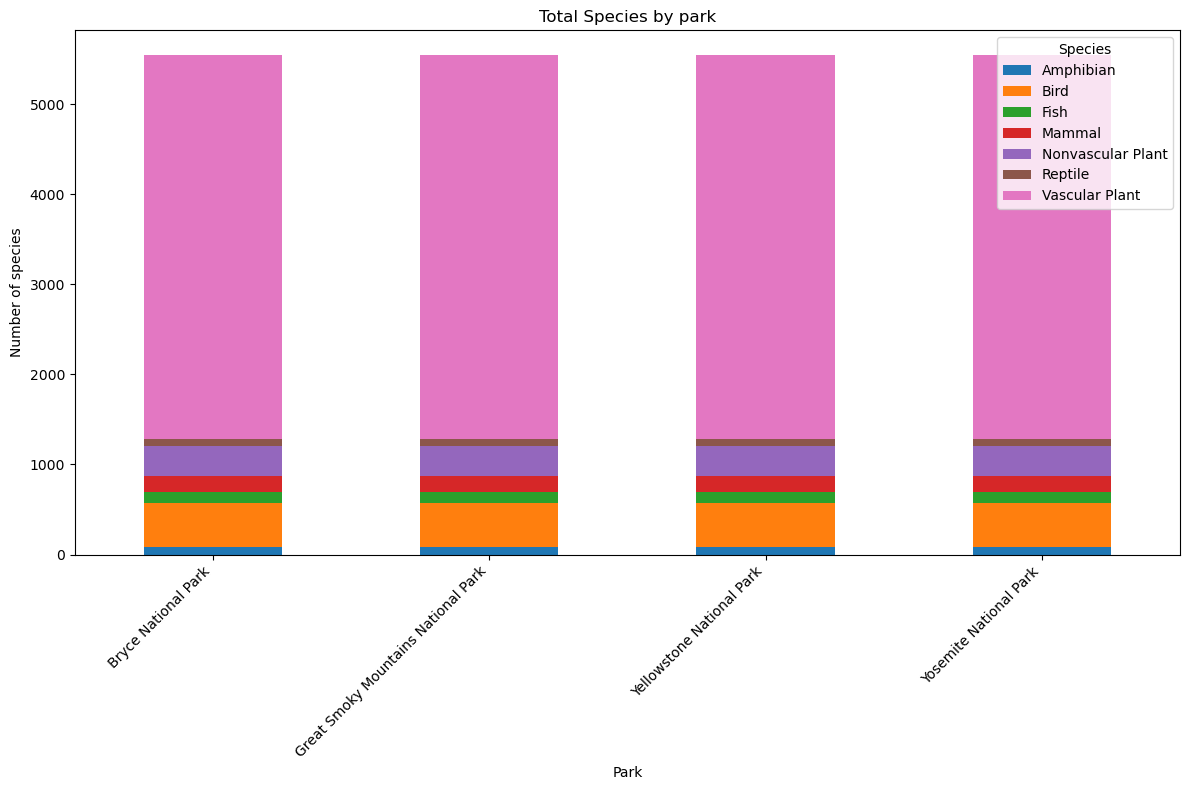

In [148]:

# Filter out 'Not At Risk' in conservation status
combine['conservation_status'] = combine['conservation_status'].astype(str)
combinecount = combine.groupby(['park_name'])['scientific_name'].nunique().reset_index()

# Aggregate observations by species category and conservation status
byspecies = combine.groupby(['park_name', 'category'])['scientific_name'].nunique().unstack(fill_value=0)

# Sort by the total observations across all conservation statuses
byspecies['Total'] = byspecies.sum(axis=1)
byspecies = byspecies.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plotting
byspecies.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add title and labels
plt.title('Total Species by park')
plt.xlabel('Park')
plt.ylabel('Number of species')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Species')
plt.tight_layout()
plt.show()

In [149]:
byspecies.head()
combinecount.head()

,park_name,scientific_name
0,Bryce National Park,5541
1,Great Smoky Mountains National Park,5541
2,Yellowstone National Park,5541
3,Yosemite National Park,5541


# Conlusion

The questions to address around the project would be:
- What is the distribution of species by conservation status?
  > There are 5363 species that are not at risk, while other 179 species need strict conservaation to protect.
  > All type of the species are of concern due to the likelihood of extinction, with birds and mammals being the 2 groups with the highest at risk proportions.
- What is the distribution of species among parks?
  > The diversity among parks are similar in terms of species, and, Yellow National Park has the most number of observations.
- Are the differences between species and their conservation status significant?
  > There is a significant association between being a mammal or a reptile and their risk status (at risk or not at risk).

# Further research

- The assumption regarding the 5,363 species considered not-at-risk requires verification through further research.
- Investigate why mammals are more likely to be at risk compared to reptiles. This could involve looking into factors such as habitat loss, hunting pressures, environmental changes, etc.
- The data is the observation in selected parks in the last 7 days, it would be curious to see how the obsservtions change overtime.

# Learning after project

### Project Architecture
> I have learned to plan a data analysis project in a structured and well-organized manner, clearly defining the scope of work and focusing on key aspects. For example, setting the project goal with investigative questions is crucial to ensure that my analysis remains relevant and central.

### Understanding the Role of Each Scope in the Holistic Data Project:

> I understand the importance of clearly defining the project scope and goals to maintain focus and relevance throughout the analysis.
Loading and Preparing Data:

> I recalled how to statistically summarize data, handle missing values, and make assumptions based on the data. This step is vital for ensuring data quality and integrity.
Data Analysis:

> I practiced descriptive analysis to understand the overall information.
> 
> I performed exploratory analysis to gain deeper insights, using techniques such as the chi-square test to examine associations between two categorical variables.

### Conclusion & Further Research:
> I formulated conclusions to address the questions set at the beginning of the project.
> Acknowledging limitations in the information and understanding, I identified areas for further research to broaden my understanding.
This structured approach ensures a comprehensive and effective data analysis project, from initial scoping to drawing conclusions and identifying future research directions.

### Technical Skills
> I have applied various techniques to modify tables, perform aggregations, and carry out calculations to summarize statistics effectively.

### Furrther action
> Prepare for final porfolio project